In [1]:
#Import the necessary function from Python Library
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

task6 = pd.read_csv('Tweets.csv')
task6.head()

#Randomly select 10,000 dataset from task6
dataset = task6.sample(n=10000, random_state = 40)

#Reset the indexing of the dataset
dataset.reset_index(drop=True, inplace=True)

In [2]:
# Imports the functions and plot the sentiment
# plotting the sentiment column of the dataset in the 2 category of positive and negative

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
%matplotlib notebook

# Product Scores
fig = px.histogram(dataset, x="sentiment")
fig.update_traces(marker_color="green",marker_line_color='rgb(8,48,90)', 
                  marker_line_width=1.0)
fig.update_layout(title_text='The Tweet Sentiment')
fig.show()

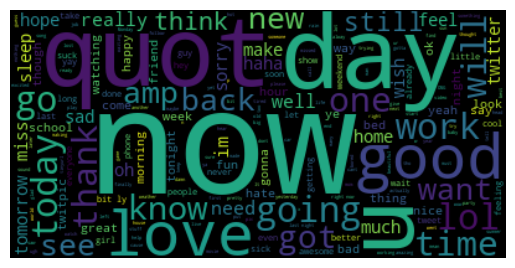

In [3]:
# imports necessary libraries including nltk, wordcloud, and STOPWORDS 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# WordCloud object is generated using the textt data and the created stopword list in tweet
# The WordCloud is displayed using matplotlib with the interpolation and axis settings.
textt = " ".join(review for review in dataset.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# Print the general words in the dataset tweet column
plt.show()

In [4]:
# split sentiment column to factual information 0 and personal opinion 1:

negative = dataset[dataset['sentiment'] == 0]
positive = dataset[dataset['sentiment'] == 1]

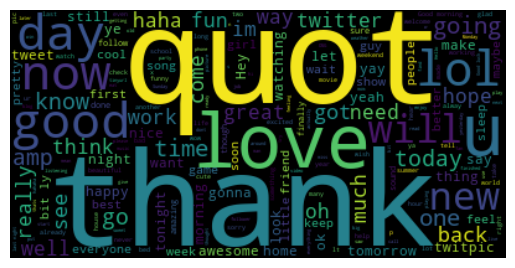

In [5]:
# Generate word clouds for positive from tweet column 

pos = " ".join(review for review in positive.tweet)
wordcloud_pos = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

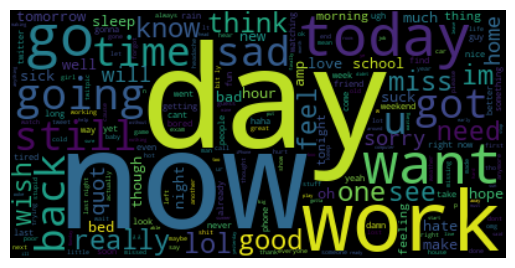

In [6]:
# Generate word clouds for negative sentiment from tweet column

fact = " ".join(str(review) for review in negative.tweet)
wordcloud_fact = WordCloud(stopwords=stopwords).generate(fact)
plt.imshow(wordcloud_fact, interpolation='bilinear')
plt.axis("off")
plt.show()

#NLP Data Cleaning

In [7]:
# removing punctuation using regular expression in tweet column

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"', "-", ","))
    return final
dataset['tweet'] = dataset['tweet'].apply(remove_punctuation)

In [8]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
dataset['tweet'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

0       @amandabyn u have to go for us in england we c...
1       just drove the maserati gransport for the bett...
2           @michelleann68 lol k off to work now have fun
3                    bore to the max cant wait to see him
4       dream witha broken heart john mayer such a bea...
                              ...                        
9995    oh it' learn at work day i forgot quick someon...
9996    pixi ha a pain swollen cheek hut realli bad ha...
9997    spread my love of jb by have peopl watch the p...
9998                          wonder where the heck he is
9999    @gerrodbland i'v had the same error wa go to g...
Name: tweet, Length: 10000, dtype: object

In [9]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
dataset['tweet']=dataset.tweet.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to C:\Users\KOLAWOLE
[nltk_data]     KEHINDE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Extracting the input (X) and output (y)

X=dataset['tweet']
y=dataset['sentiment']

# Count Vectoriser
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)

In [11]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
# 33% of dataset is used as test set and 67% is used  to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

# The First step is to define the six classification models
# importing the six classifiers which include SVM, RF, KNN, DT, GNB and LR
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [12]:
# Define the different Classifiers

SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [13]:
# Step 2: training the six classifiers models

SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

GaussianNB()

In [14]:
#Step 3: prediction of the six classification models

y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [15]:
#Step 4:
# The function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'Confusion Matrix of NB')

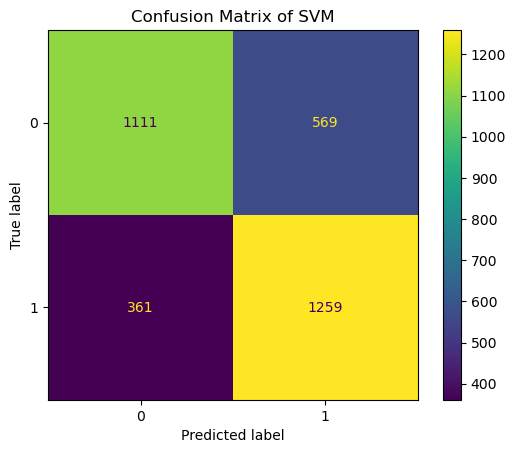

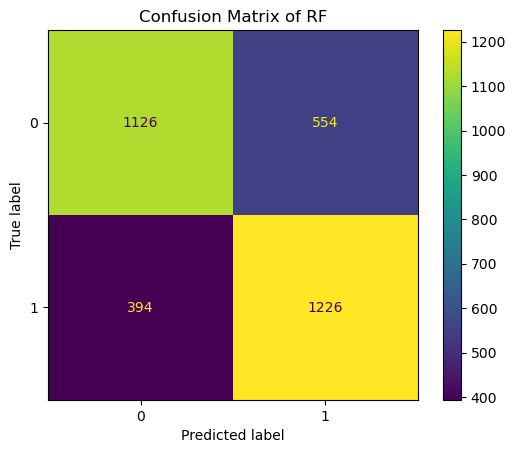

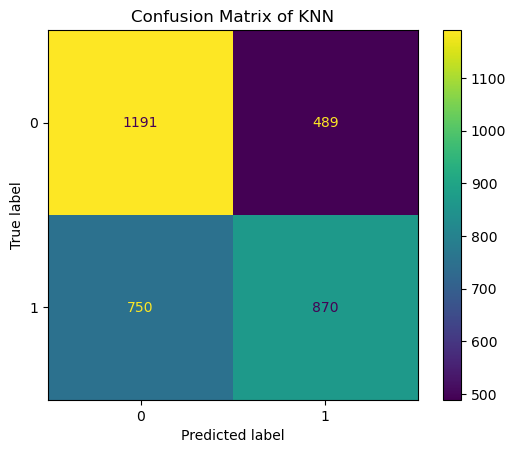

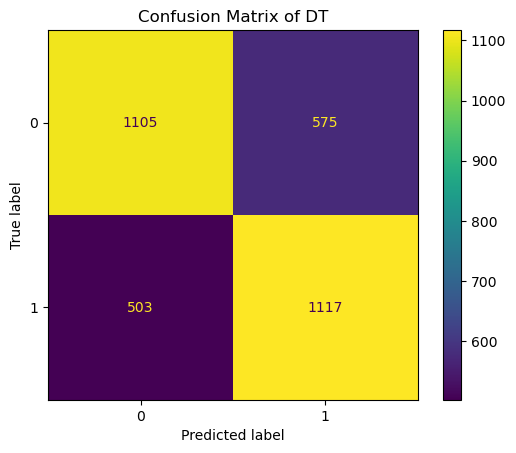

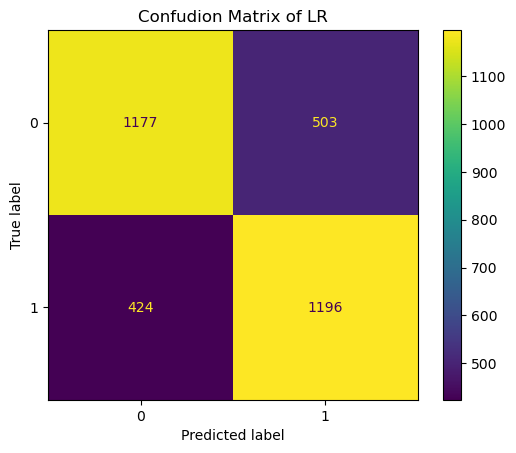

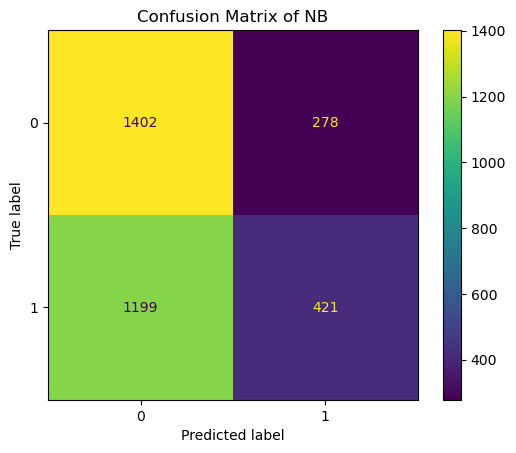

In [16]:
# Step 5:
# Creating the confusion matrics for all classifiers' predictions

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("Confusion Matrix of SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("Confusion Matrix of RF")

cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("Confusion Matrix of KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("Confusion Matrix of DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=DT.classes_)
disp.plot()
plt.title("Confudion Matrix of LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=DT.classes_)
disp.plot()
plt.title("Confusion Matrix of NB")

In [17]:
#printing the evaluation metrics for all the six classifiers

print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 1259
True Negatives: 1111
False Positives: 569
False Negatives: 361
--------------------------------------------------
Accuracy: 0.72
Mis-Classification: 0.28
Sensitivity: 0.78
Specificity: 0.66
Precision: 0.66
f_1 Score: 0.71



RF metrics

True Positives: 1226
True Negatives: 1126
False Positives: 554
False Negatives: 394
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.76
Specificity: 0.67
Precision: 0.67
f_1 Score: 0.71



KNN metrics

True Positives: 870
True Negatives: 1191
False Positives: 489
False Negatives: 750
--------------------------------------------------
Accuracy: 0.62
Mis-Classification: 0.38
Sensitivity: 0.54
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.61



DT metrics

True Positives: 1117
True Negatives: 1105
False Positives: 575
False Negatives: 503
--------------------------------------------------
Accuracy: 0.67
Mis-Classification: 0.33
Sensitivity: 0.69
Specificity: 0.66
Pr